**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


Grupo:
Integrantes

1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

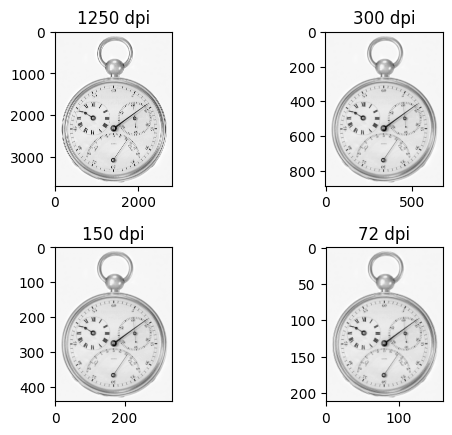

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def reamostragem(img, old_dpi, new_dpi):
    """
        Realiza o processo de reamostragem da imagem passada, reamostrand de old_dpi para new_dpi.
        
        Args:
            img (np.ndarray): A imagem que será reamostrada.
            old_dpi (int): O dpi da imagem.
            new_dpi (int): O dpi desejado.
            
        Returns:
            Numpy.ndarray, representando a nova imagem.
    """
    
    altura = img.shape[0]
    largura = img.shape[1]
    
    proporcao = new_dpi / old_dpi # Proporção do dpi da nova imagem em relação à original.
    
    nova_altura = int(altura * proporcao) 
    nova_largura = int(largura * proporcao)
    #Tamanho da nova imagem
    
    pixels_por_pixel = altura // nova_altura 
    # Indica a quantidade de pixels da imagem antiga que devem ser condensados em um único pixel da nova imagem.
    # Valor serve tanto para altura como para largura
    pixel_fracionario = (altura / nova_altura) - pixels_por_pixel
    # A parte fracionário é somada até ultrapassar 1. Quanto isso acontece o pixel novo em questão terá um pixel antigo à mais. 

    nova_img = np.zeros((nova_altura, nova_largura))

    altura_atual = 0
    soma_altura = 0
    soma_largura = 0
    pixels_altura = pixels_por_pixel
    for i in range(0,nova_altura):
        
        if not soma_altura < 1:
            pixels_altura += 1
        
        largura_atual = 0
        pixels_largura = pixels_por_pixel
        for j in range(0, nova_largura):
            # (i,j) é o novo pixel
            
            if not soma_largura < 1:
                pixels_largura += 1
            
            nova_img[i,j] = np.sum(img[altura_atual:(altura_atual + pixels_altura), largura_atual:(largura_atual + pixels_largura)])
            nova_img[i,j] = int( nova_img[i,j] / (pixels_altura * pixels_largura))
            
            largura_atual += pixels_largura
            
            if not soma_largura < 1:
                soma_largura -= 1
                pixels_largura -= 1
            
            soma_largura += pixel_fracionario

        altura_atual += pixels_altura
        if not soma_altura < 1:
            soma_altura -= 1
            pixels_altura -= 1

        soma_altura += pixel_fracionario
        
    return nova_img

if __name__ == "__main__":
    img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)
    # img is a numpy.ndarray

    #print('Tamanho da imagem : ',img.shape)

    # Original
    plt.subplot(2,2,1)
    plt.subplots_adjust(hspace=0.4)
    
    plt.title('1250 dpi')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

    # 300 dpi
    plt.subplot(2,2,2)
    plt.title('300 dpi')       
    img_300 = reamostragem(img,1250,300)        
    plt.imshow(img_300, cmap='gray', vmin=0, vmax=255)
    
    # 150 dpi
    plt.subplot(2,2,3)
    plt.title('150 dpi')        
    img_150 = reamostragem(img,1250,150)        
    plt.imshow(img_150, cmap='gray', vmin=0, vmax=255)
    
    # 72 dpi
    plt.subplot(2,2,4)
    plt.title('72 dpi')        
    img_72 = reamostragem(img,1250,72)        
    plt.imshow(img_72, cmap='gray', vmin=0, vmax=255)
    


2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão